In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data
data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

/Users/christofferhoeg/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Remove missing values
data = data1.dropna()

initial_row_count = len(data)

# Deleting rows where 'Age' is less than 18
deleted_rows = data[data['age'] < 18]
data = data[data['age'] >= 18]

# Counting rows after deletion
final_row_count = len(data)

# Counting the number of rows deleted
rows_deleted = initial_row_count - final_row_count

# Ignore the warning related to threadpool_info
warnings.filterwarnings("ignore", category=UserWarning, message="Your installed NumPy version")

print(f"Rows deleted: {rows_deleted}")


Rows deleted: 13


In [3]:

print(data['Cart_Abandonment_Factors'].unique())

['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


In [4]:

# Function to map purchase frequency to a numeric value
def map_cart_abandonment_factors(freq):
    mapping = {
        "others": 4,
        "Changed my mind or no longer need the item'": 3,
        "High shipping costs": 2,
        "Found a better price elsewhere'": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Cart_Abandonment_Factors_Num'] = data['Cart_Abandonment_Factors'].apply(map_cart_abandonment_factors)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Abandonment_Factors_Num'] = scaler.fit_transform(data[['Cart_Abandonment_Factors_Num']])

In [5]:
# Split 'Purchase_Categories' into binary columns for each category
category_columns = data['Purchase_Categories'].str.get_dummies(sep=';')

# Define the mapping function
def map_category(category):
    mapping = {
        "Groceries and Gourmet Food": 5,
        "Home and Kitchen": 4,
        "Clothing and Fashion": 3,
        "Beauty and Personal Care": 2,
        "others": 1
    }
    return mapping.get(category, 0)

# Apply the mapping to each category column
for column in category_columns.columns:
    category_columns[column] = category_columns[column].apply(map_category)


In [6]:
# Normalize Recommendation_Helpfulness

# Function to map purchase frequency to a numeric value
def map_recommendation_helpfulness(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Recommendation_Helpfulness_Num'] = data['Recommendation_Helpfulness'].apply(map_recommendation_helpfulness)

# Normalize the new column
scaler = MinMaxScaler()
data['Recommendation_Helpfulness_Num'] = scaler.fit_transform(data[['Recommendation_Helpfulness_Num']])

print(data['Recommendation_Helpfulness'].unique())

['Yes' 'Sometimes' 'No']


In [7]:
data['Review_Reliability'].unique()
# Normalize Review_Reliability

# Function to map purchase frequency to a numeric value
def map_review_reliability(freq):
    mapping = {
        "Heavily": 5,
        "Moderately": 4,
        "Occasionally": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Review_Reliability_Num'] = data['Review_Reliability'].apply(map_review_reliability)

# Normalize the new column
scaler = MinMaxScaler()
data['Review_Reliability_Num'] = scaler.fit_transform(data[['Review_Reliability_Num']])

In [8]:
# Normalize purchase_frequency

# Function to map purchase frequency to a numeric value
def map_purchase_frequency(freq):
    mapping = {
        "Multiple times a week": 5,
        "Once a week": 4,
        "Few times a month": 3,
        "Once a month": 2,
        "Less than once a month": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Purchase_Frequency_Num'] = data['Purchase_Frequency'].apply(map_purchase_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Purchase_Frequency_Num'] = scaler.fit_transform(data[['Purchase_Frequency_Num']])

In [9]:
# Normalize Browsing_Frequency

def map_browsing_Frequency(freq):
    mapping = {
        "Multiple times a day": 4,
        "Few times a week": 3,
        "Few times a month": 2,
        "Rarely": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Browsing_Frequency_Num'] = data['Browsing_Frequency'].apply(map_browsing_Frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Browsing_Frequency_Num'] = scaler.fit_transform(data[['Browsing_Frequency_Num']])

In [10]:
# Normalize Personalized_Recommendation_Frequency

# Function to map purchase frequency to a numeric value
def map_personalized_recommendation_frequency(freq):
    mapping = {
        "Yes": 3,
        "Sometimes": 2,
        "No": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Personalized_Recommendation_Frequency_Num'] = data['Personalized_Recommendation_Frequency'].apply(map_personalized_recommendation_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Personalized_Recommendation_Frequency_Num'] = scaler.fit_transform(data[['Personalized_Recommendation_Frequency_Num']])

print(data['Personalized_Recommendation_Frequency'].unique())

['Yes' 'No' 'Sometimes']


In [11]:
# Normalize Cart_Completion_Frequency
def map_cart_completion_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Cart_Completion_Frequency_Num'] = data['Cart_Completion_Frequency'].apply(map_cart_completion_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Cart_Completion_Frequency_Num'] = scaler.fit_transform(data[['Cart_Completion_Frequency_Num']])

In [12]:
# Normalize Saveforlater_Frequency
def map_saveforlater_frequency(freq):
    mapping = {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1
    }
    return mapping.get(freq, 0)  # return 0 or some default value for any unexpected category

# Apply the mapping to the dataframe
data['Saveforlater_Frequency_Num'] = data['Saveforlater_Frequency'].apply(map_saveforlater_frequency)

# Normalize the new column
scaler = MinMaxScaler()
data['Saveforlater_Frequency_Num'] = scaler.fit_transform(data[['Saveforlater_Frequency_Num']])

/var/folders/qv/wp98lnwx4kg0ft3xfs16j7km0000gn/T/ipykernel_28268/4152749072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[selected_columns].corr()


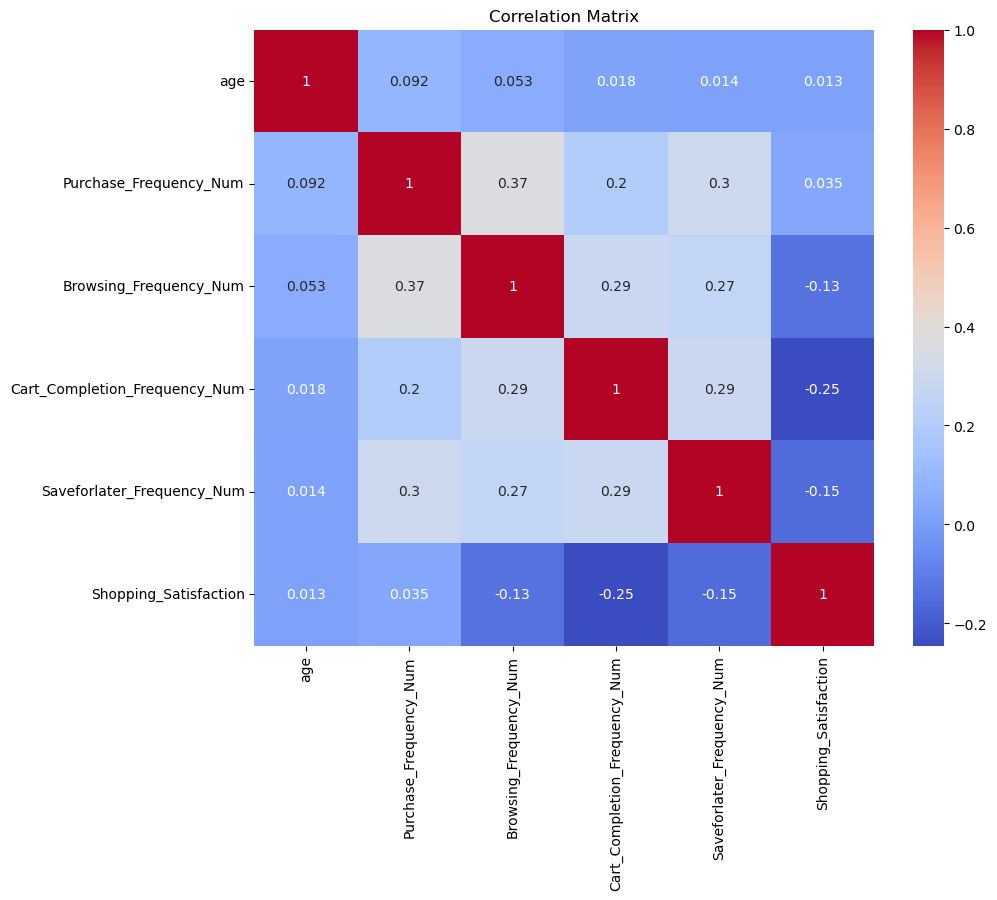

In [13]:
# Select relevant columns for correlation. For example:
selected_columns = ['age', 'Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Shopping_Satisfaction']  # add your selected columns

# Create the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Define a threshold for high browsing frequency
high_browsing_threshold = 0.5  # This is arbitrary and can be adjusted based on your data distribution
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]
low_browsing_freq = data[data['Browsing_Frequency_Num'] <= high_browsing_threshold]

# Analyzing Purchase_Frequency based on Recommendation_Helpfulness within high browsing frequency segment
high_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] > high_browsing_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_browsing_freq[high_browsing_freq['Recommendation_Helpfulness_Num'] <= high_browsing_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): {mean_purchase_high_recommend}")
print(f"Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): {mean_purchase_low_recommend}")


Average Purchase Frequency (High Browsing & High Recommendation Helpfulness): 0.5327380952380952
Average Purchase Frequency (High Browsing & Low Recommendation Helpfulness): 0.528969957081545


In [15]:
# Still need to add the right Personalized Recommendation Frequency
# Segmenting based on Browsing Frequency
high_browsing_freq = data[data['Browsing_Frequency_Num'] > high_browsing_threshold]

# Further segmenting based on Personalized Recommendation Frequency
# (Assuming high recommendation frequency is represented by a higher numerical value)
high_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] > high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]
low_rec_freq = high_browsing_freq[high_browsing_freq['Personalized_Recommendation_Frequency_Num'] <= high_browsing_freq['Personalized_Recommendation_Frequency_Num'].median()]

# Analyzing Purchase Frequency
high_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] > high_rec_freq['Recommendation_Helpfulness_Num'].median()]
low_recommend = high_rec_freq[high_rec_freq['Recommendation_Helpfulness_Num'] <= high_rec_freq['Recommendation_Helpfulness_Num'].median()]

mean_purchase_high_recommend_high_rec = high_recommend['Purchase_Frequency_Num'].mean()
mean_purchase_low_recommend_high_rec = low_recommend['Purchase_Frequency_Num'].mean()

print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): {mean_purchase_high_recommend_high_rec}")
print(f"Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): {mean_purchase_low_recommend_high_rec}")


Average Purchase Frequency (High Browsing, High Rec Frequency & High Recommendation Helpfulness): 0.5540540540540541
Average Purchase Frequency (High Browsing, High Rec Frequency & Low Recommendation Helpfulness): 0.5590909090909091


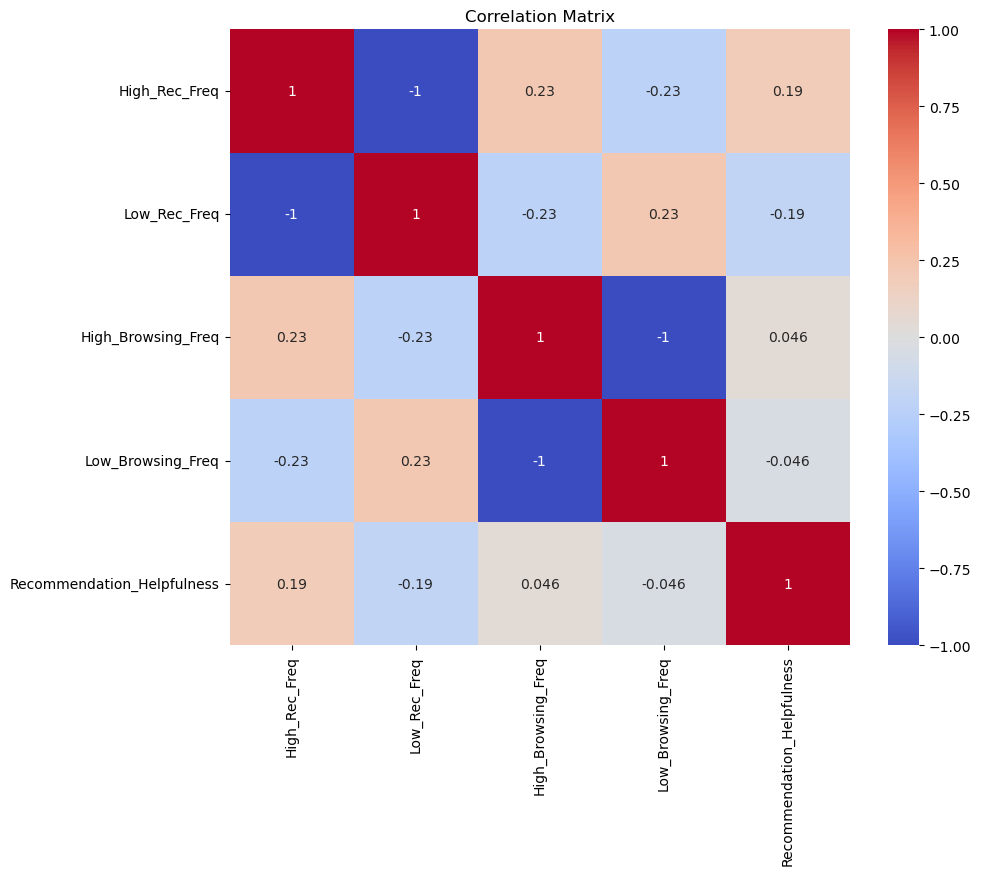

In [16]:
# Create a new DataFrame for the correlation analysis
correlation_data = pd.DataFrame()

# Assuming you have functions or logic to determine these segments
# Convert these segments into binary numerical values (1 for high, 0 for low)
correlation_data['High_Rec_Freq'] = data['Personalized_Recommendation_Frequency_Num'].apply(lambda x: 1 if x > data['Personalized_Recommendation_Frequency_Num'].median() else 0)
correlation_data['Low_Rec_Freq'] = 1 - correlation_data['High_Rec_Freq']
correlation_data['High_Browsing_Freq'] = data['Browsing_Frequency_Num'].apply(lambda x: 1 if x > high_browsing_threshold else 0)
correlation_data['Low_Browsing_Freq'] = 1 - correlation_data['High_Browsing_Freq']
correlation_data['Recommendation_Helpfulness'] = data['Recommendation_Helpfulness_Num']  # Assuming it's already numerical

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Gender groups
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Create age groups
bins = [20, 30, 40, 50, 60, 70]  # Adjust bins as needed
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

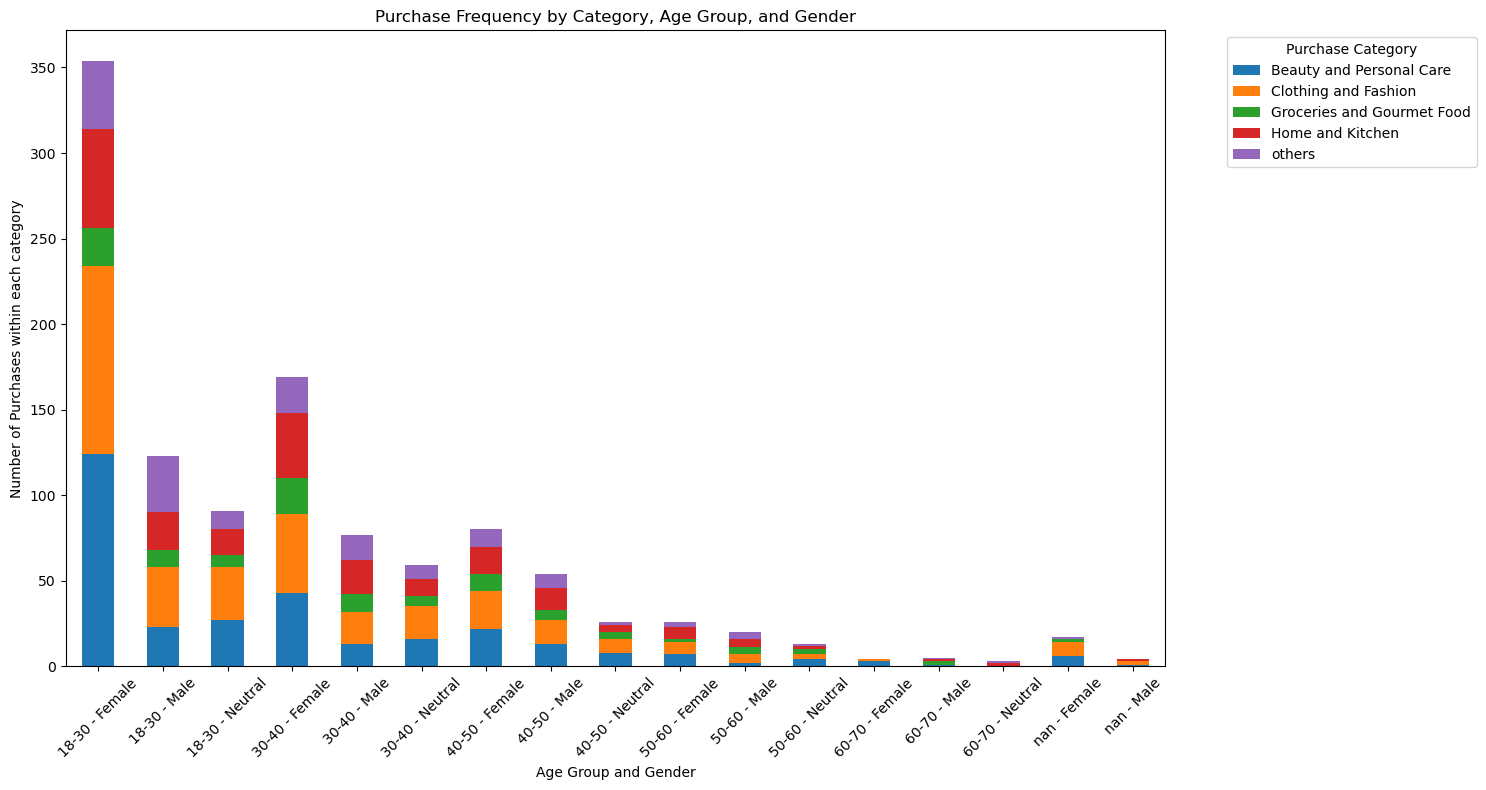

In [18]:


# Assuming 'data' is your DataFrame

# Step 1: Split 'Purchase_Categories' into individual entries
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Convert 'Age_Group' and 'Gender' to strings if they are categorical
data_split['Age_Group'] = data_split['Age_Group'].astype(str)
data_split['Gender'] = data_split['Gender'].astype(str)

# Create a new column that combines 'Age_Group' and 'Gender'
data_split['Age_Gender'] = data_split['Age_Group'] + " - " + data_split['Gender']

# Step 3: Group by 'Age_Gender' and 'Split_Category' and count occurrences
category_age_gender_count = data_split.groupby(['Age_Gender', 'Split_Category']).size().reset_index(name='Count')

# Pivot to get 'Age_Gender' on the x-axis and 'Split_Category' as separate columns
category_pivot = category_age_gender_count.pivot(index='Age_Gender', columns='Split_Category', values='Count').fillna(0)

# Step 4: Plot the data with seaborn for better aesthetics
plt.figure(figsize=(15, 8))
category_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Purchases within each category')
plt.title('Purchase Frequency by Category, Age Group, and Gender')
plt.legend(title='Purchase Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


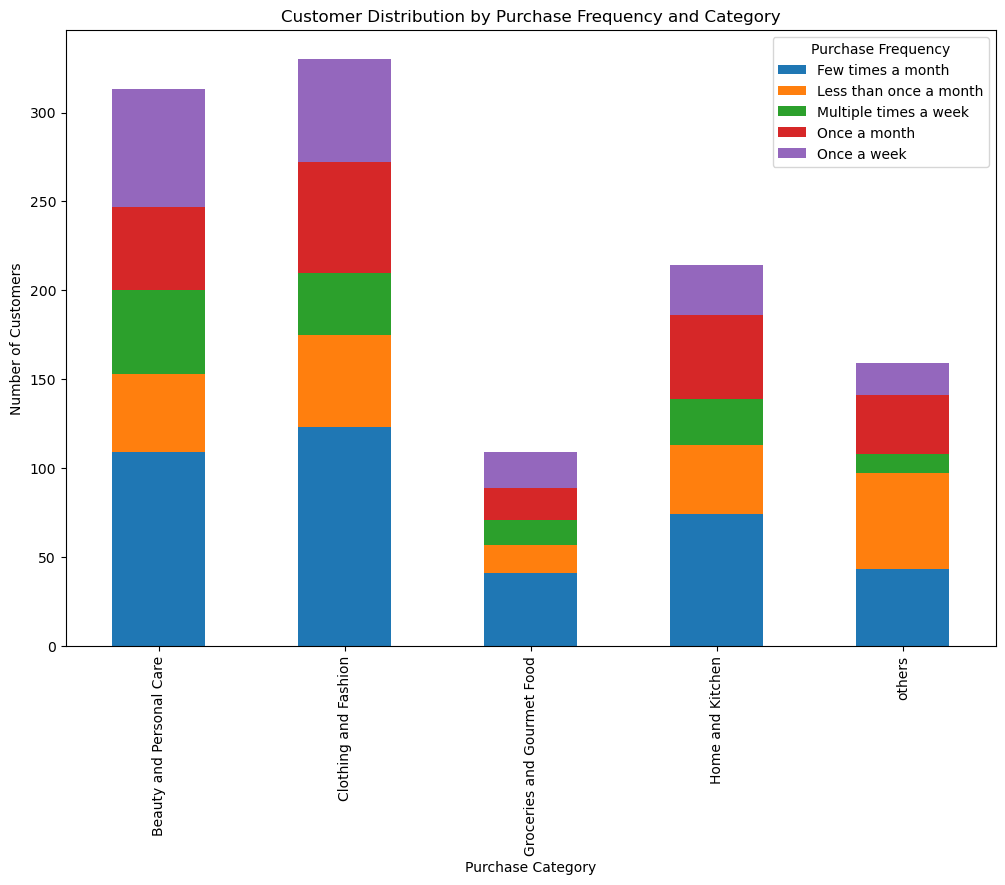

In [19]:
split_categories = data['Purchase_Categories'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
split_categories.name = 'Split_Category'
data_split = data.join(split_categories)

# Step 2: Group by 'Split_Category' and 'Purchase_Frequency' and count the number of customers
category_freq_count = data_split.groupby(['Split_Category', 'Purchase_Frequency']).size().unstack(fill_value=0)

# Step 3: Visualize the Data
category_freq_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Purchase Category')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Purchase Frequency and Category')
plt.legend(title='Purchase Frequency')
plt.show()

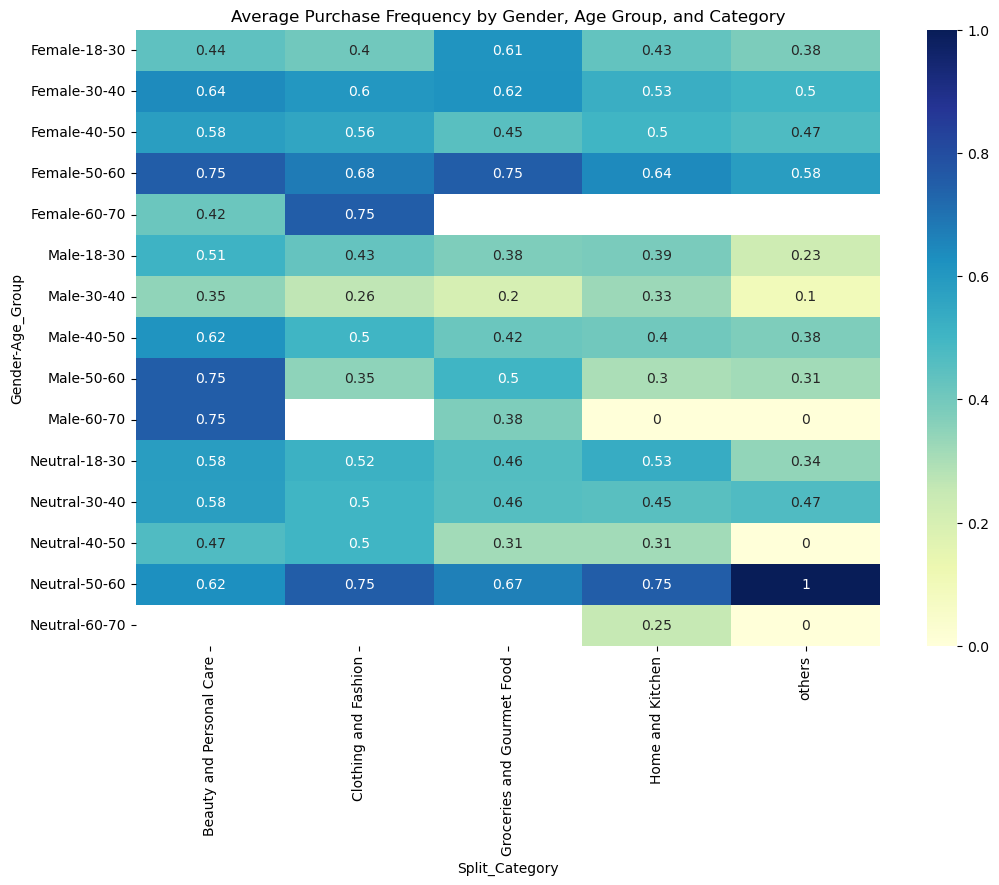

In [20]:
# Ensure data_split is updated with the new 'Age_Group'
data_split = data.join(split_categories)  # Assuming split_categories is already defined

# Group by Gender, Age_Group, and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Age_Group', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index=['Gender', 'Age_Group'], columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender, Age Group, and Category')
plt.show()

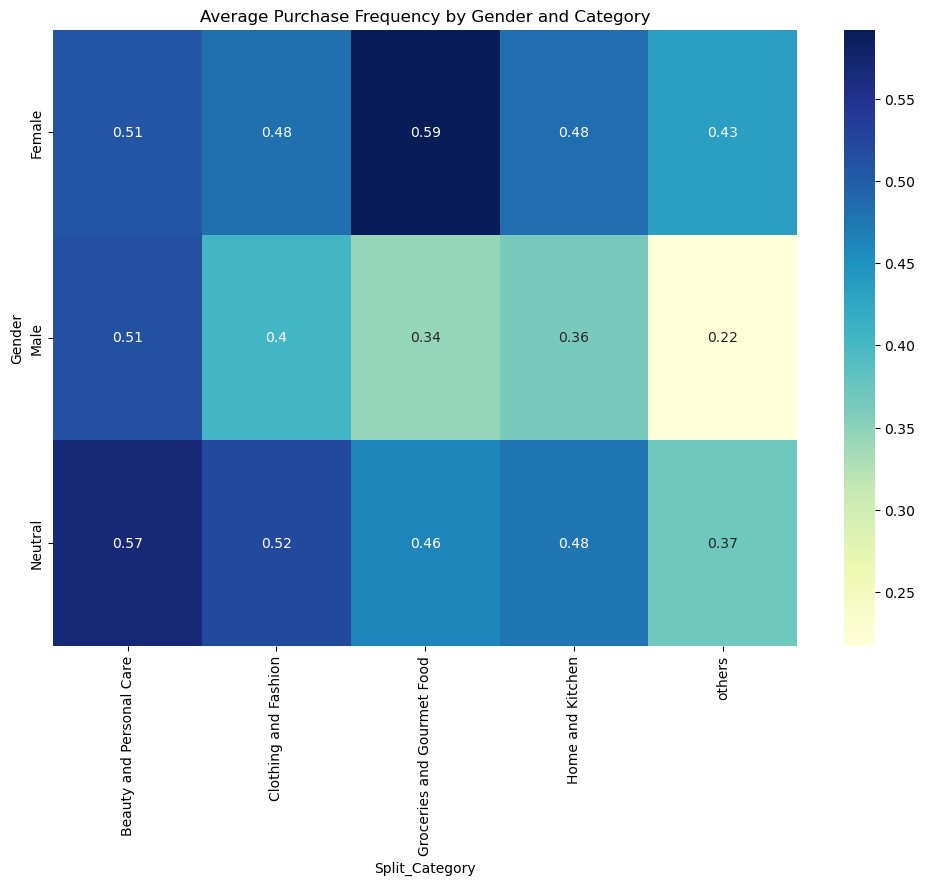

In [21]:
# Assuming 'data' is your DataFrame and 'data_split' has been prepared with 'Split_Category'

# Replace 'others' and 'Prefer not to say' in the Gender column
data['Gender'] = data['Gender'].replace(['Others', 'Prefer not to say'], 'Neutral')

# Group by Gender and Split_Category, then calculate the mean purchase frequency
grouped_data = data_split.groupby(['Gender', 'Split_Category'])['Purchase_Frequency_Num'].mean()

# Convert the grouped data to a DataFrame
grouped_df = grouped_data.reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_df.pivot_table(index='Gender', columns='Split_Category', values='Purchase_Frequency_Num')

# Plotting the pivot table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Purchase Frequency by Gender and Category')
plt.show()

In [22]:
# Assuming data is your DataFrame and the columns have been appropriately preprocessed
X = data[['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num']]

# Elbow Method for optimal number of clusters
# ...

# Applying K-Means Clustering
k = 4  # Replace with the optimal number from the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add cluster ID to the DataFrame
data['Behavioral_Cluster_ID'] = y_kmeans

# Pair Plot for visualization
sns.pairplot(data, vars=['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Completion_Frequency_Num', 'Saveforlater_Frequency_Num'], hue='Behavioral_Cluster_ID')
plt.show()

/Users/christofferhoeg/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Select the relevant columns for clustering
selected_columns = ['Purchase_Frequency_Num', 'Browsing_Frequency_Num', 'Cart_Abandonment_Factors_Num', 'Shopping_Satisfaction']
X = data[selected_columns]

# Standardize the data (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method, choose an appropriate value for k and perform clustering
# Replace 'chosen_k' with your selected number of clusters
chosen_k = 3
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to your original dataset
data['Cluster'] = cluster_labels

# Now you have a 'Cluster' column in your dataset indicating the cluster each customer belongs to
# You can analyze and interpret the clusters to understand customer segments

# For example, to see the mean values of the selected columns for each cluster:
cluster_means = data.groupby('Cluster')[selected_columns].mean()
print(cluster_means)


AttributeError: 'NoneType' object has no attribute 'split'